In [85]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings("ignore")

# Basic
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
import random
from tqdm.autonotebook import tqdm
import string
from collections import Counter
import re

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

%matplotlib inline
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 100) 

In [56]:
df = pd.read_excel("Case Prediction Data.xlsx")

In [86]:
df

,Case Number,Subject,Date Created,Date Closed,Origin,Case Type,SLA,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title
0,379395,Support Case #379090 - Distributions not appea...,2020-01-01 09:11:00,2020-01-07 14:35:00,Web,Concern,Platinum,Support Case #379090 - Distributions not appea...,International (US),Returns / Reports,International Reports,NaN,NaN,Answer exists KB,190726092347463,How to make adjustments to 2017 dividends for ...
1,379398,I cannot get the 2019 loadset of corptax to op...,2020-01-01 10:38:00,2020-01-03 15:33:00,Web,Problem / Error,Silver,User is unable to login to corptax,Compliance,Login,Error Message,NaN,NaN,Need more information,NaN,NaN
2,379402,Postmark date shows 15 and efile package creat...,2020-01-02 00:51:00,2020-01-03 07:57:00,Web,Question / How To,Platinum,We created an e-file package in India on 10/16...,Compliance,Returns / Reports,NaN,NaN,US.NY.City.NewYorkCity,Answer exists Help,NaN,NaN
3,379403,Replace SaaS Contact,2020-01-02 00:55:00,2020-01-02 11:50:00,Web,Question / How To,Silver,Can you replace SAAS admin Li Mei with Andrew ...,Application Hosting,Environment Maintenance,NaN,NaN,NaN,"Customer, Contact, or Order Record Required Ma...",NaN,NaN
4,379404,"International form 5471, Sch H is not posted c...",2020-01-02 03:56:00,2020-01-02 09:42:00,Web,Concern,Platinum,"International form 5471, Sch H is not posted c...",International (US),Returns / Reports,5471 Workpapers,NaN,US,Answer exists KB,190912210032428,Form 5471 Workpaper Error- Cannot find account...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101138,516175,Form 5471 Schedule J page 1 line 3 doesn't tie...,2022-07-31 10:29:00,2022-07-31 10:43:00,Web,NaN,Silver,NaN,Compliance,Amounts,NaN,NaN,NaN,Customer no longer needs assistance,NaN,NaN
101139,516176,IN - The RecipientFID element is invalid - The...,2022-07-31 12:49:00,2022-08-01 08:00:00,Web,Efile,Platinum,N - The RecipientFID element is invalid - The ...,Compliance,Returns / Reports,NaN,NaN,US.IN,Create/Update KB,220801175624903,IN e-File Error - The RecipientFID element is ...
101140,516177,IN Line 26 'INResearchExpCredit' is not null o...,2022-07-31 12:56:00,2022-08-01 13:45:00,Web,Efile,Platinum,ITR20REC efile error,Compliance,Returns / Reports,NaN,NaN,US.IN,Walk through,220801174553833,IN e-File Error - IN Line 26 'INResearchExpCre...
101141,516178,Remove Apphosting access for MRochaix,2022-07-31 18:39:00,2022-08-02 09:05:00,Web,Question / How To,Gold,Remove Apphosted User Account,Application Hosting,Maintenance,Remove User Account,NaN,NaN,SaaS service request completed,NaN,NaN


In [87]:
df.isnull().sum()

Case Number              0
Subject                  0
Date Created             0
Date Closed             44
Origin                   0
Case Type             1624
SLA                     33
Problem Statement     1537
Product                113
Product Area           201
Product Category     62618
Product Type         93955
Jurisdiction         43350
Resolution             740
KB #                 77328
KB Title             77555
dtype: int64

In [88]:
missing_values = df.isna().sum()
px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"), template='plotly_dark')

In [89]:
len(df.Subject.value_counts())

86591

In [90]:
df.Origin.value_counts()

Web                         74791
Other / Internal Request    12126
eFile Reject                 5712
Phone                        4812
E-mail                       3597
Community                     105
Name: Origin, dtype: int64

In [91]:
df

,Case Number,Subject,Date Created,Date Closed,Origin,Case Type,SLA,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title
0,379395,Support Case #379090 - Distributions not appea...,2020-01-01 09:11:00,2020-01-07 14:35:00,Web,Concern,Platinum,Support Case #379090 - Distributions not appea...,International (US),Returns / Reports,International Reports,NaN,NaN,Answer exists KB,190726092347463,How to make adjustments to 2017 dividends for ...
1,379398,I cannot get the 2019 loadset of corptax to op...,2020-01-01 10:38:00,2020-01-03 15:33:00,Web,Problem / Error,Silver,User is unable to login to corptax,Compliance,Login,Error Message,NaN,NaN,Need more information,NaN,NaN
2,379402,Postmark date shows 15 and efile package creat...,2020-01-02 00:51:00,2020-01-03 07:57:00,Web,Question / How To,Platinum,We created an e-file package in India on 10/16...,Compliance,Returns / Reports,NaN,NaN,US.NY.City.NewYorkCity,Answer exists Help,NaN,NaN
3,379403,Replace SaaS Contact,2020-01-02 00:55:00,2020-01-02 11:50:00,Web,Question / How To,Silver,Can you replace SAAS admin Li Mei with Andrew ...,Application Hosting,Environment Maintenance,NaN,NaN,NaN,"Customer, Contact, or Order Record Required Ma...",NaN,NaN
4,379404,"International form 5471, Sch H is not posted c...",2020-01-02 03:56:00,2020-01-02 09:42:00,Web,Concern,Platinum,"International form 5471, Sch H is not posted c...",International (US),Returns / Reports,5471 Workpapers,NaN,US,Answer exists KB,190912210032428,Form 5471 Workpaper Error- Cannot find account...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101138,516175,Form 5471 Schedule J page 1 line 3 doesn't tie...,2022-07-31 10:29:00,2022-07-31 10:43:00,Web,NaN,Silver,NaN,Compliance,Amounts,NaN,NaN,NaN,Customer no longer needs assistance,NaN,NaN
101139,516176,IN - The RecipientFID element is invalid - The...,2022-07-31 12:49:00,2022-08-01 08:00:00,Web,Efile,Platinum,N - The RecipientFID element is invalid - The ...,Compliance,Returns / Reports,NaN,NaN,US.IN,Create/Update KB,220801175624903,IN e-File Error - The RecipientFID element is ...
101140,516177,IN Line 26 'INResearchExpCredit' is not null o...,2022-07-31 12:56:00,2022-08-01 13:45:00,Web,Efile,Platinum,ITR20REC efile error,Compliance,Returns / Reports,NaN,NaN,US.IN,Walk through,220801174553833,IN e-File Error - IN Line 26 'INResearchExpCre...
101141,516178,Remove Apphosting access for MRochaix,2022-07-31 18:39:00,2022-08-02 09:05:00,Web,Question / How To,Gold,Remove Apphosted User Account,Application Hosting,Maintenance,Remove User Account,NaN,NaN,SaaS service request completed,NaN,NaN


In [92]:
typecounts = df.Origin.value_counts().to_dict()
df1 = pd.DataFrame(list(typecounts.items()), columns=['Origin', 'Counts'])

fig = px.pie(df1, values='Counts', names='Origin',
             title='Origin',labels='Origin')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [64]:
df.columns

Index(['Case Number', 'Subject', 'Date Created', 'Date Closed', 'Origin',
       'Case Type', 'SLA', 'Problem Statement', 'Product', 'Product Area',
       'Product Category', 'Product Type', 'Jurisdiction', 'Resolution',
       'KB #', 'KB Title'],
      dtype='object')

In [68]:
typecounts = df["Case Type"].value_counts().to_dict()
df1 = pd.DataFrame(list(typecounts.items()), columns=['Case_type', 'Counts'])

fig = px.pie(df1, values='Counts', names='Case_type',
             title='Case Type',labels='Case_type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [72]:
typecounts = df["SLA"].value_counts().to_dict()
df1 = pd.DataFrame(list(typecounts.items()), columns=['SLA', 'Counts'])

fig = px.pie(df1, values='Counts', names='SLA',
             title='SLA',labels='SLA')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [73]:
typecounts = df["Product"].value_counts().to_dict()
df1 = pd.DataFrame(list(typecounts.items()), columns=['Product', 'Counts'])

fig = px.pie(df1, values='Counts', names='Product',
             title='Product',labels='Product')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [81]:
typecounts = df["Product Area"].value_counts()
typecounts = pd.DataFrame(typecounts).reset_index()
fig = px.bar(typecounts, 
             x="index", 
             y="Product Area",  
             title="Frequency of Product Area",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

In [83]:
len(df["Resolution"].value_counts())

143

In [84]:
typecounts = df["Resolution"].value_counts()
typecounts = pd.DataFrame(typecounts).reset_index()
fig = px.bar(typecounts, 
             x="index", 
             y="Resolution",  
             title="Frequency of Resolution",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

In [78]:
df1 = df[["Problem Statement"]]
df1

,Problem Statement
0,Support Case #379090 - Distributions not appea...
1,User is unable to login to corptax
2,We created an e-file package in India on 10/16...
3,Can you replace SAAS admin Li Mei with Andrew ...
4,"International form 5471, Sch H is not posted c..."
...,...
101138,NaN
101139,N - The RecipientFID element is invalid - The ...
101140,ITR20REC efile error
101141,Remove Apphosted User Account


In [79]:
df1.isnull().sum()

Problem Statement    1537
dtype: int64

In [80]:
df1.shape

(101143, 1)

In [81]:
df1 = df.dropna(axis=0)
df1.shape

(168, 16)

In [82]:
stemmer = SnowballStemmer('english')
import re
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [83]:
%time df1['review_clean'] = df1["Problem Statement"].apply(review_to_words)

Wall time: 44.5 ms


In [84]:
df1

,Case Number,Subject,Date Created,Date Closed,Origin,Case Type,SLA,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title,review_clean
226,379744,IBT import,2020-01-05 15:29:00,2020-01-06 17:55:00,Web,Question / How To,Platinum,Client Net Income per Books in the Current Inc...,Provision,Federal,Reports,Current/Deferred/RTA,US,Answer exists KB,041511315111608,Provision - How to enter Book Income,client net incom per book current incom tax su...
991,380910,The two reports after TB import,2020-01-12 20:22:00,2020-01-13 17:11:00,Web,Question / How To,Silver,Client has some reconciling items after perfor...,Provision,Federal,Data Entry,Enter Amounts,US,Answer exists KB,041229318815861,Custom Calcs - Custom calcs that will post Net...,client reconcil item perform trial balanc impo...
1379,381460,Encryption and signing certificate for SSO exp...,2020-01-14 15:56:00,2020-01-28 15:19:00,Web,Question / How To,Silver,Encryption and signing certificate for SSO exp...,Compliance,Login,Claims,Provide Renewed Certificate,US,Answer exists KB,041417810525904,Corptax® SaaS SSO SAML Claims Configuration Pr...,encrypt sign certif sso expir
1404,381487,Encryption and signing certificate for SSO exp...,2020-01-14 16:54:00,2020-01-22 13:08:00,Web,Question / How To,Silver,Encryption and signing certificate for SSO exp...,Compliance,Login,Claims,Provide Renewed Certificate,US,Completed ADFS configuration,041417810525904,Corptax® SaaS SSO SAML Claims Configuration Pr...,encrypt sign certif sso expir
1642,381809,FTC VA Input,2020-01-15 19:12:00,2020-01-16 11:05:00,Web,Question / How To,Silver,Client is wanting to allocate their Valuation ...,Provision,Federal,Reports,Current/Deferred/RTA,US,Answer exists KB,041309321015246,Can a Return to Provision adjustment be made t...,client want alloc valuat allow return provis c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97653,511509,Diagnostic error for M-1,2022-06-15 07:32:00,2022-06-15 10:21:00,Web,Problem / Error,Silver,Form 1120 - The Diagnostics report shows a dif...,Compliance,Amounts,Data Entry,Adjustment,US,Answer exists KB,170406083136462,Form 1120 - The Diagnostics report shows a dif...,form diagnost report show differ taxabl incom ...
97920,511859,Deferred balance does not show up for valuatio...,2022-06-17 11:27:00,2022-06-17 14:45:00,Web,Problem / Error,Silver,On the Valuation Date entry - functional curre...,Provision,Federal,Reports,Current/Deferred/RTA,US,Answer exists Help,220323073405917,Provision - Release information for the enhanc...,valuat date entri function currenc first colum...
98681,512883,NOL Beginning Balance,2022-06-28 16:40:00,2022-06-28 17:25:00,Web,Problem / Error,Platinum,The beginning balance of an NOL was rolled for...,Provision,Federal,Reports,Current/Deferred/RTA,US,Answer exists KB,041229318350698,Provision - NOL Carryovers are not reflected i...,begin balanc nol roll forward correct current ...
98686,512894,Corptax Office Excel Add-In - Data Map Import,2022-06-28 17:54:00,2022-06-29 10:12:00,Web,Problem / Error,Silver,Client is unable to import data into Corptax u...,Office - Excel Add-In,Excel Templates,Data Import Templates,Error Message,US,Answer exists KB,190117082605552,Corptax® Office Error - Unexpected character e...,client unabl import data corptax use offic ins...


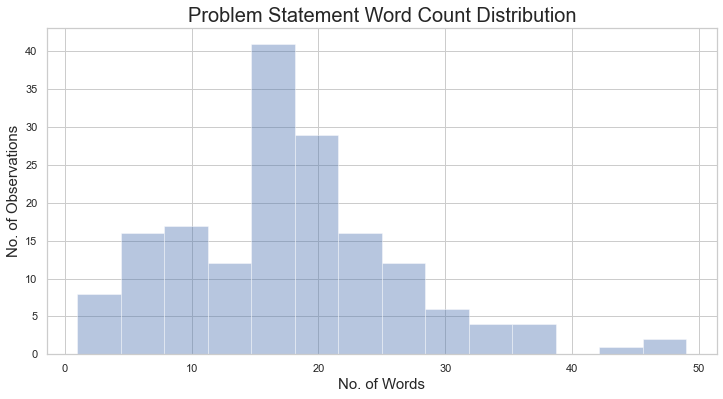

In [85]:
word_count = [len(x.split()) for x in df1['Problem Statement'].tolist()]
barplot_dim = (12, 6)
ax = plt.subplots(figsize =barplot_dim);
ax = sns.distplot(word_count, kde=False);
ax.set_ylabel('No. of Observations', size=15)
ax.set_xlabel('No. of Words', size=15)
ax.set_title('Problem Statement Word Count Distribution', size=20);

In [86]:
def text_cleaning(text):
    '''
    Converts all text to lower case, Removes special charecters, emojis and multiple spaces
    text - Sentence that needs to be cleaned
    '''
    text = ''.join([k for k in text if k not in string.punctuation])
    text = str(text).lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(' +', ' ', text)
    return text

In [87]:
tqdm.pandas()
df1['clean'] = df1['review_clean'].progress_apply(text_cleaning)

  0%|          | 0/168 [00:00<?, ?it/s]

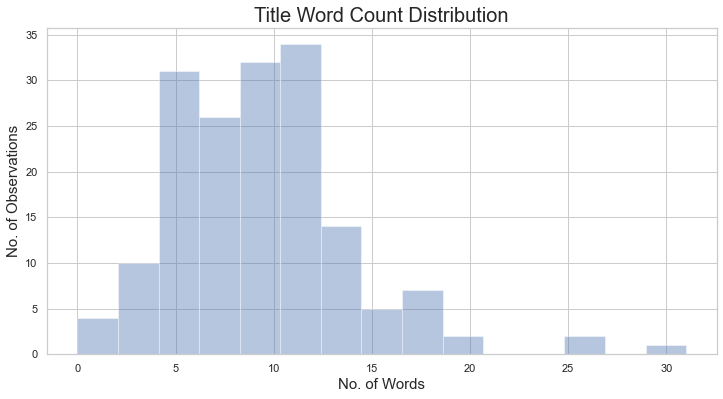

In [88]:
word_count = [len(x.split()) for x in df1['clean'].tolist()]
barplot_dim = (12, 6)
ax = plt.subplots(figsize =barplot_dim);
ax = sns.distplot(word_count, kde=False);
ax.set_ylabel('No. of Observations', size=15)
ax.set_xlabel('No. of Words', size=15)
ax.set_title('Title Word Count Distribution', size=20);

In [91]:
temp_df = pd.DataFrame()
df1['temp_list'] = df1['clean'].apply(lambda x :str(x).split())
top = Counter([item for sublist in df1['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp.columns = ['Common Words', 'Count']
temp.style.background_gradient(cmap='Reds')

,Common Words,Count
0,client,116
1,provis,54
2,amount,46
3,tax,37
4,know,36
5,state,34
6,need,30
7,report,27
8,balanc,25
9,defer,25


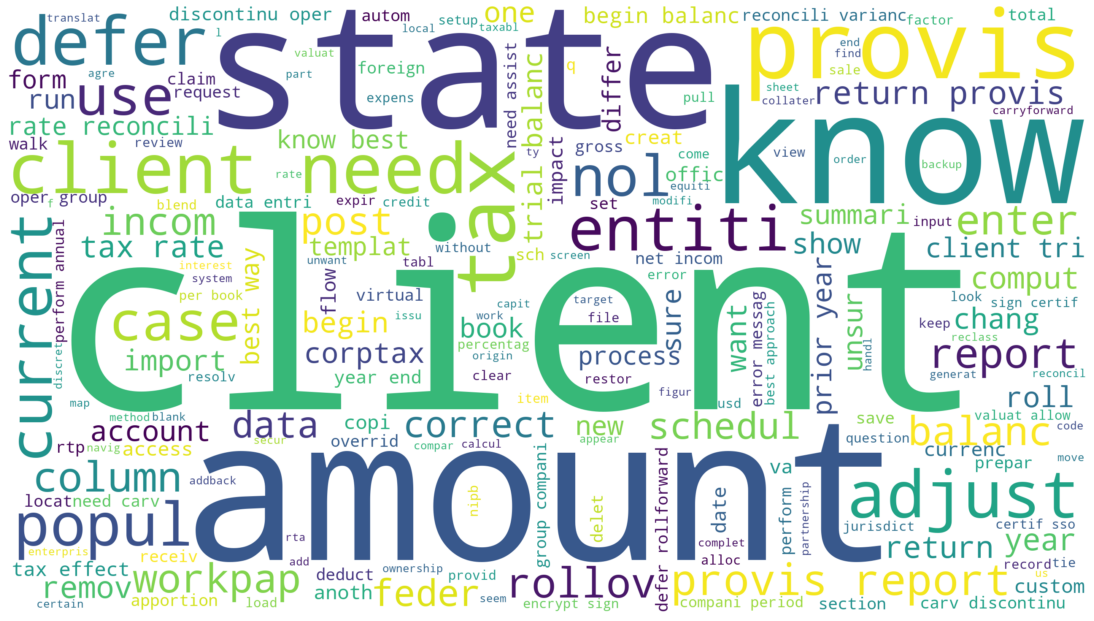

In [92]:
text = ' '.join(df1['clean'])
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, width=2560, height=1440).generate(text)

barplot_dim = (15, 15)
ax = plt.subplots(figsize=barplot_dim, facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [95]:
df1["Case Type"].value_counts()

Question / How To         91
Problem / Error           68
Concern                    5
Installation / Upgrade     3
Enhancement Request        1
Name: Case Type, dtype: int64